# STUDENT PERFORMANCE PREDICTION

# Dataset Description

#### This dataset contains information about student performance in Portugese in two different secondary schools. The dataset includes student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. The attribute information can be seen below:
* school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex: student's sex (binary: 'F' - female or 'M' - male)
* age: student's age (numeric: from 15 to 22)
* address: student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade 3-secondary education or 4-higher education)
* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3 - secondary education or 4- higher education)
* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian: student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures: number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* nursery: attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: Internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health: current health status (numeric: from 1 - very bad to 5 - very good)
* absences: number of school absences (numeric: from 0 to 93)
* G1: first period grade (numeric: from 0 to 20)
* G2: second period grade (numeric: from 0 to 20)
* G3: final grade (numeric: from 0 to 20, output target)

# Load the data

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#load and preview the dataset
df = pd.read_csv('student-por.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Data Cleaning

In [10]:
#check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values in the dataset.

In [11]:
# check for duplicates
df.duplicated().value_counts()

False    649
dtype: int64

The dataset has no dupicates 

In [12]:
# renaming columns
new_names = {'famsize':'fam_size','Pstatus': 'p_status',
             'Medu':'m_edu','Fedu':'f_edu','Mjob':'m_job',
             'Fjob':'f_job','traveltime':'travel_time',
             'studytime':'study_time','schoolsup':'school_sup',
             'famrel':'fam_rel','famsup':'fam_sup','freetime':'free_time',
             'goout':'go_out','Dalc':'D_alc','Walc':'W_alc'}

df.rename(columns=new_names,inplace=True)
df.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'D_alc', 'W_alc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Exploratory data analysis

QUESTIONS

Financial

1. Effect of mother's job on students performance

2. Effect of mother's education on students performance

3. Relationship between extra educational support and paid extra classes on performance

Psychological

4. Relationship between parental earnings and quality of family relationships

5. Effect of romantic relationships on performance


Lifestyle

6. Effect of alcohol consumption on performance

7. How extra-curricular activities affect performance

### Univariate analysis

G3 is the target variable in this dataset. We will start by analyzing the target variable.

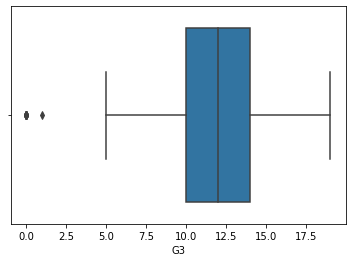

In [13]:
# boxplot of the target variable
sns.boxplot(x = df['G3']);

In [14]:
# Identify the outliers
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['G3'] < (Q1 - 1.5 * IQR)) | (df['G3'] > (Q3 + 1.5 * IQR))]
outliers['G3'].unique()

array([0, 1], dtype=int64)

The final grade(G3) has outliers. It consists of students with a grade of 0 and 1. <br>
These outliers won't be dropped since the students performed poorly.

In [21]:
df2 = df[df['G3'] <10]
df2

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,7
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,4,10,9,9
81,GP,M,15,U,GT3,T,2,3,other,other,...,5,3,2,1,2,5,2,10,9,9
100,GP,M,16,U,GT3,T,4,4,services,services,...,4,5,5,5,5,4,12,9,9,8
125,GP,M,15,U,GT3,T,3,4,services,services,...,5,5,5,3,2,5,2,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,MS,F,17,R,GT3,T,3,1,at_home,other,...,4,5,4,2,3,1,10,8,9,9
637,MS,M,18,R,GT3,T,2,1,other,other,...,4,4,3,1,3,5,0,7,7,0
639,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
640,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0


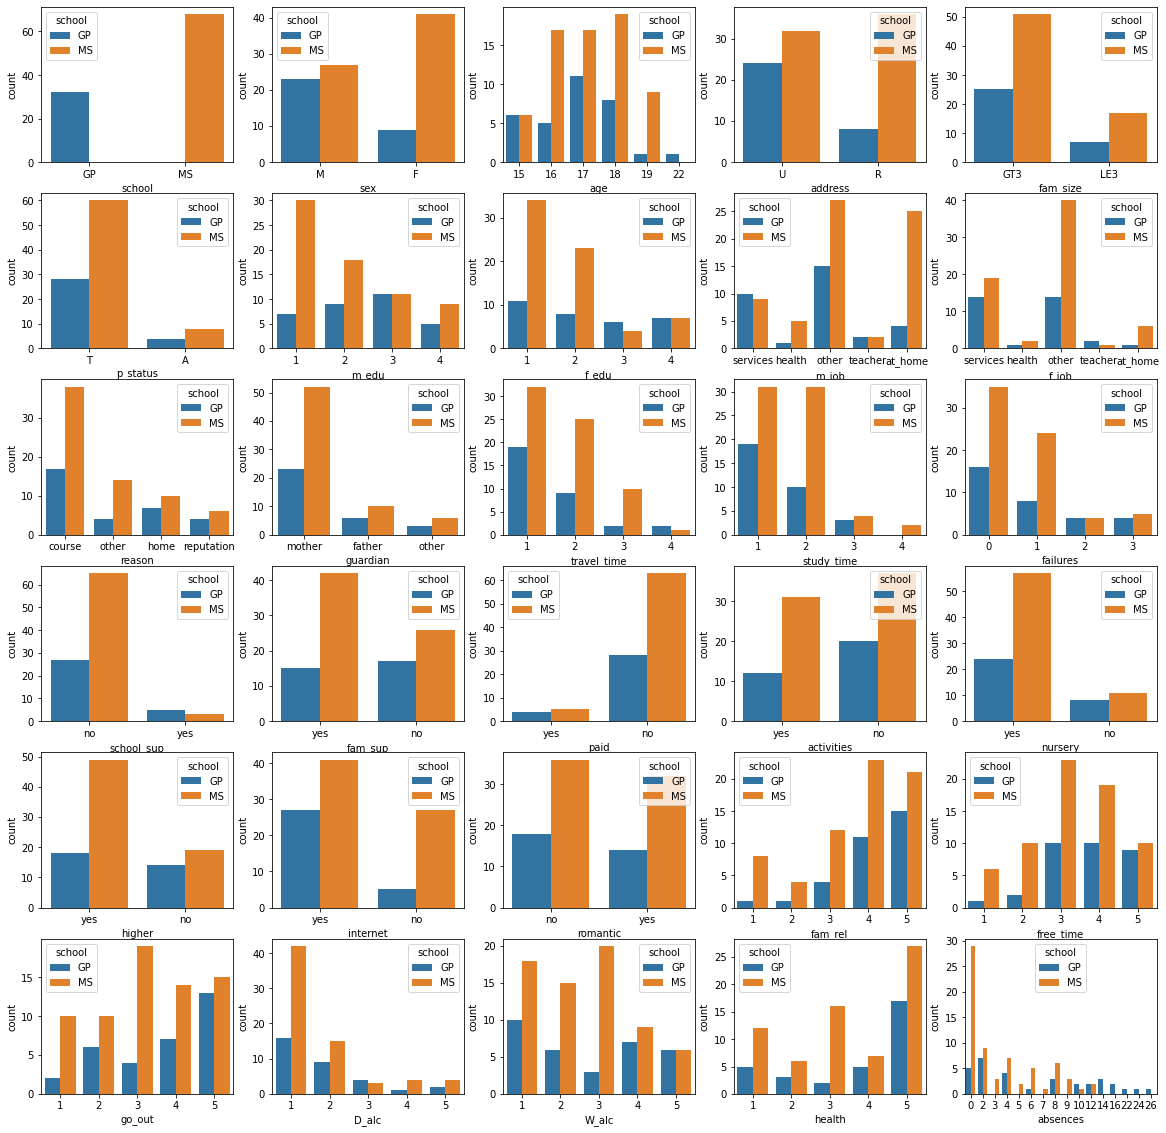

In [33]:
# countplot with various columns
import warnings
warnings.filterwarnings('ignore')
features = df2[['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'D_alc', 'W_alc', 'health', 'absences']]
fig , ax = plt.subplots(6,5,figsize = (20,20))     
for i , subplots in zip (features, ax.flatten()):  
    sns.countplot(features[i],ax = subplots, data = df2,hue = 'school')
plt.show()

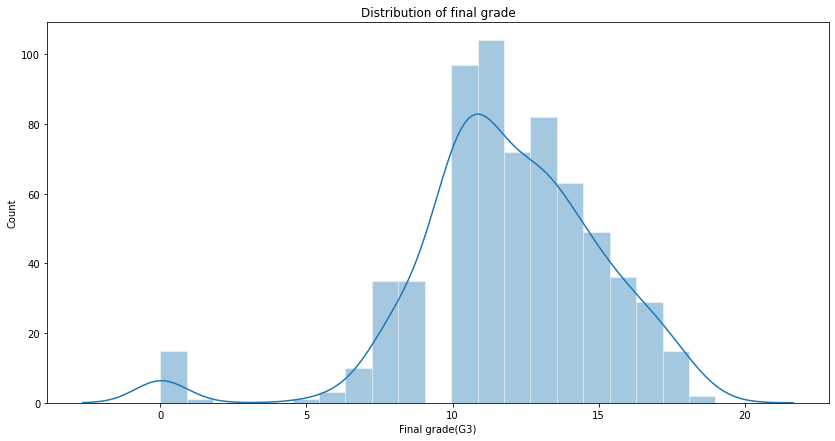

In [9]:
# Distribution of the target variable
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(df['G3'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
ax.set_title('Distribution of final grade')
ax.set_xlabel('Final grade(G3)');

The final grade is not normally distributed. Most students have a final grade between 10 and 15. There are a few students performing poorly, with a grade less than 5.<br>
Log transformation would be applied to the final grade column to make the distribution less skewed. 

In [10]:
# unique values of some columns
cols = df.select_dtypes(include='object').columns
for col in cols:
    print(col.upper())
    print(df[col].value_counts())
    print('****************************************************** \n')

SCHOOL
GP    423
MS    226
Name: school, dtype: int64
****************************************************** 

SEX
F    383
M    266
Name: sex, dtype: int64
****************************************************** 

ADDRESS
U    452
R    197
Name: address, dtype: int64
****************************************************** 

FAM_SIZE
GT3    457
LE3    192
Name: fam_size, dtype: int64
****************************************************** 

P_STATUS
T    569
A     80
Name: p_status, dtype: int64
****************************************************** 

M_JOB
other       258
services    136
at_home     135
teacher      72
health       48
Name: m_job, dtype: int64
****************************************************** 

F_JOB
other       367
services    181
at_home      42
teacher      36
health       23
Name: f_job, dtype: int64
****************************************************** 

REASON
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
*

In [11]:
# summary statistics of numerical columns
df.describe()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


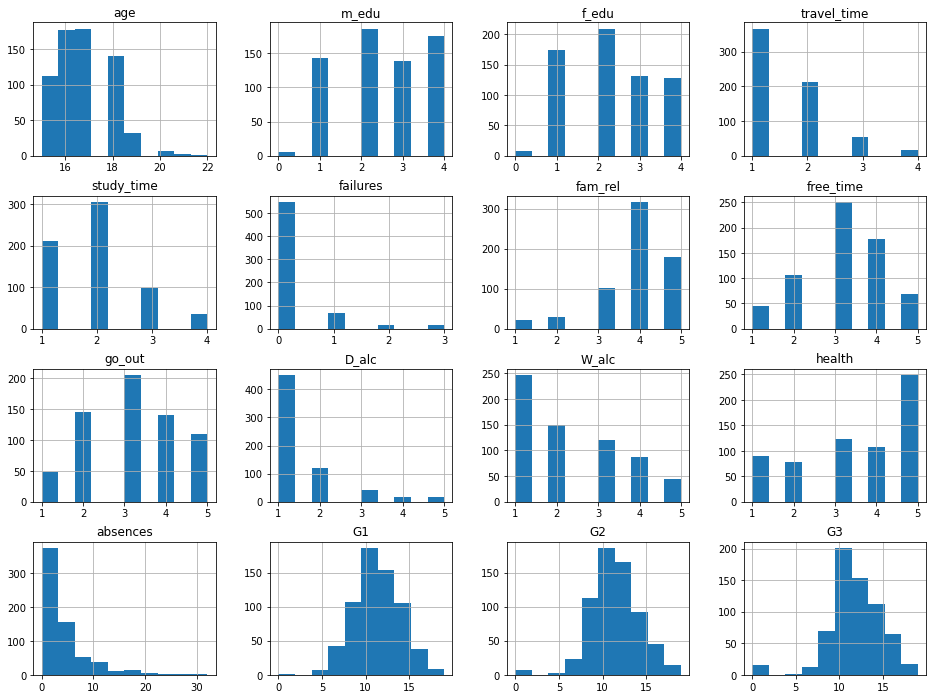

In [12]:
# distribution of features
df.hist(figsize=(16,12));

Some features are not normally distributed. Scaling differs across the features. The features will therefore have to be scaled and normalized.

### Bivariate analysis

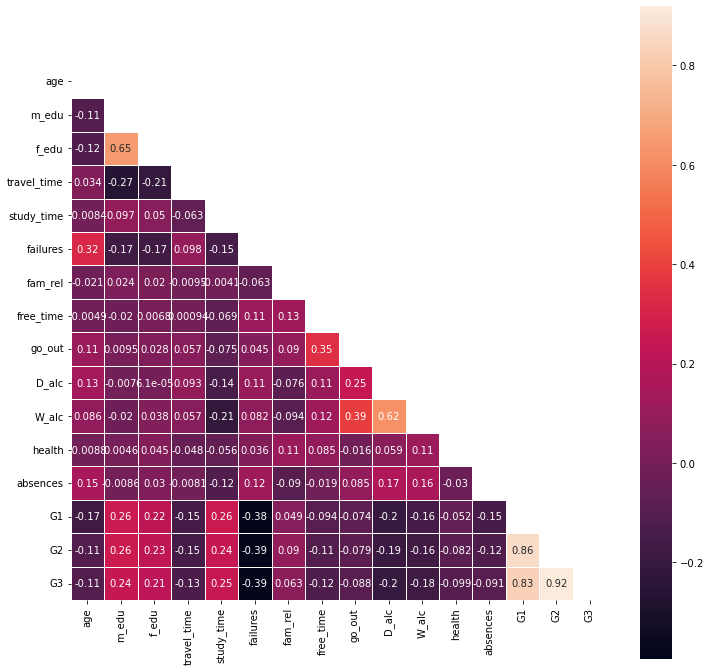

In [13]:
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

G1 and G2 have a strong positive correlation with G3. <br>
There is a strong positive correlation between G1 and G2. One of these features has to be dropped to handle multicollinearity.<br>
Most of the other features have a low correlation with each other.

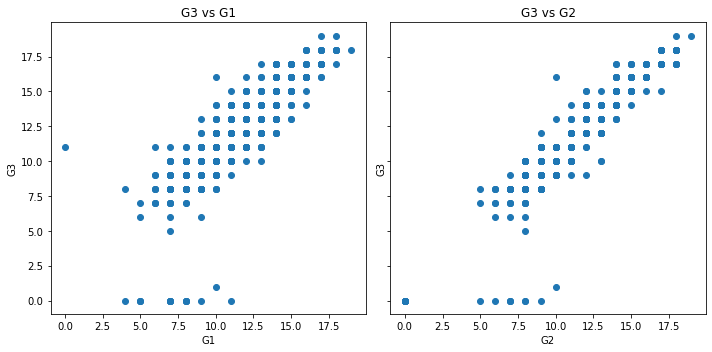

In [26]:
#scatter plots of G3 vs G1 and G3 vs G2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True )
ax1.scatter(df['G1'], df['G3'])
ax1.set_title(f'G3 vs G1')
ax1.set_xlabel('G1')
ax1.set_ylabel('G3')

ax2.scatter(df['G2'], df['G3'])
ax2.set_title(f'G3 vs G2')
ax2.set_xlabel('G2')
ax2.set_ylabel('G3')
fig.tight_layout();

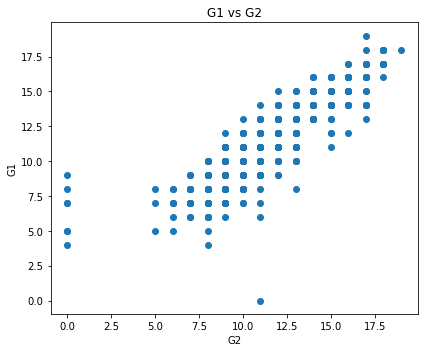

In [27]:
#scatter plots of G1 vs G2
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(df['G2'], df['G1'])
ax.set_title(f'G1 vs G2')
ax.set_xlabel('G2')
ax.set_ylabel('G1')
fig.tight_layout();

Since the dataset contains information about student performance in two different secondary schools, we can use a boxplot to show the spread/ distribution of students' final grades by school.

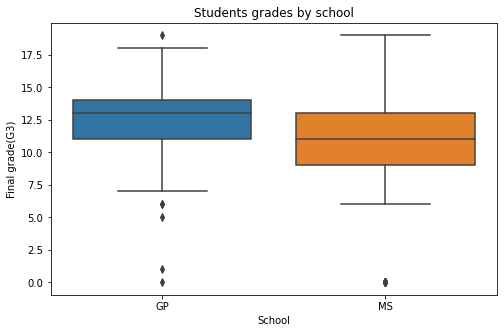

In [28]:
# Box plot of students' grades by school
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='school', y='G3',data=df, ax=ax)
ax.set_title('Students grades by school')
ax.set_xlabel('School')
ax.set_ylabel('Final grade(G3)');

Comparison of final grades of students in 2 different schools, MS(Mousinho da Silveira) and GP(Gabriel Pereira):
- GP has a higher median grade than MS.
- GP has a smaller box showing that the middle 50% of the data is less dispersed. MS has a longer box showing that the middle 50% of the data is more dispersed.
- GP has a shorter whisker to whisker length while MS has a longer whisker to whisker length. This shows that GP has a lowe spread(range) of data than MS.
- GP has more outliers than MS. <br>
#### NB: <br>
Range = Length of the entire box plot<br>
IQR = Length of the box

# CONCLUSIONS



-  most underperforming students study from MS(Mousinho da Silveira)

-  Internet connectivity is available to the majority of pupils.

-  The investigation reveals that the pupils' relationships with their families are positive.

-  They don't drink alcohol on the weekends or on workdays.

-  The students are interested in attending a higher education.

-  Less than two hours a week are spent studying by the pupils who perform poorly.

-  The least number of absences were reported by the pupils who performed poorly.

-  The majority of pupils that perform poorly have a pattern in which their parents work in various types of jobs.




